In [22]:
# Dimitrios Bakalis

import pandas as pd 
from pandas import DataFrame

import numpy as np

import sklearn
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics
import sklearn.cluster as sk_cluster

import seaborn as sns

import matplotlib.pyplot as plt

import time

import math
import operator
import json 
import random
import nltk

In [23]:
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [25]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [77]:
features_mean= list(df.columns[2:12])
features_se= list(df.columns[12:22])
features_worst=list(df.columns[22:32])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<AxesSubplot:>

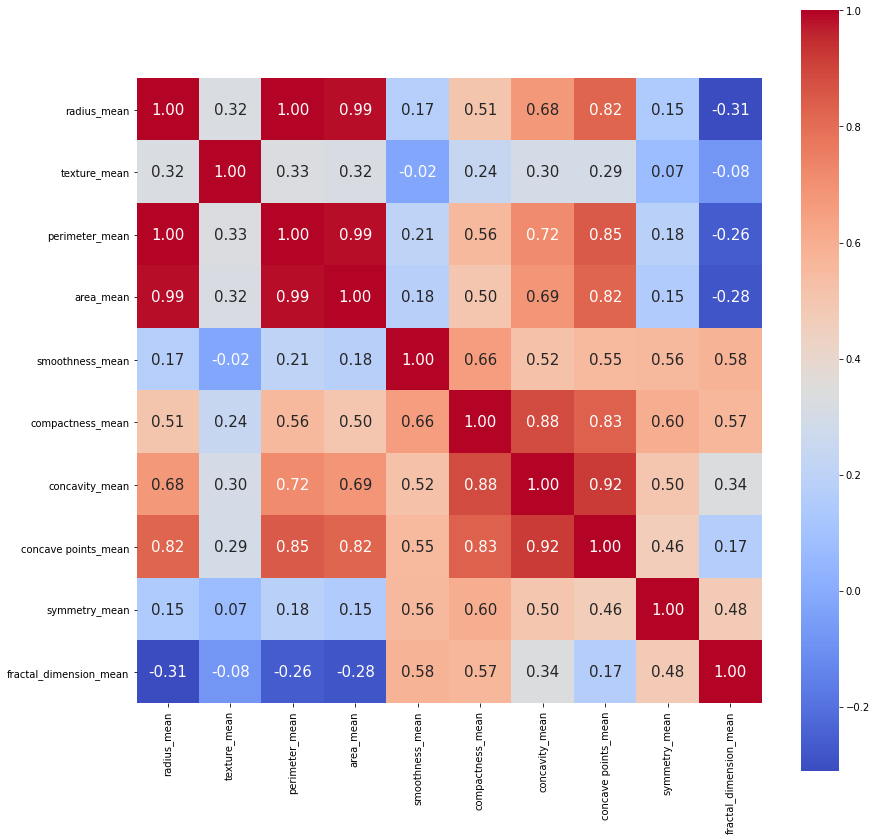

In [78]:
corr = df[features_mean].corr()   # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

<AxesSubplot:>

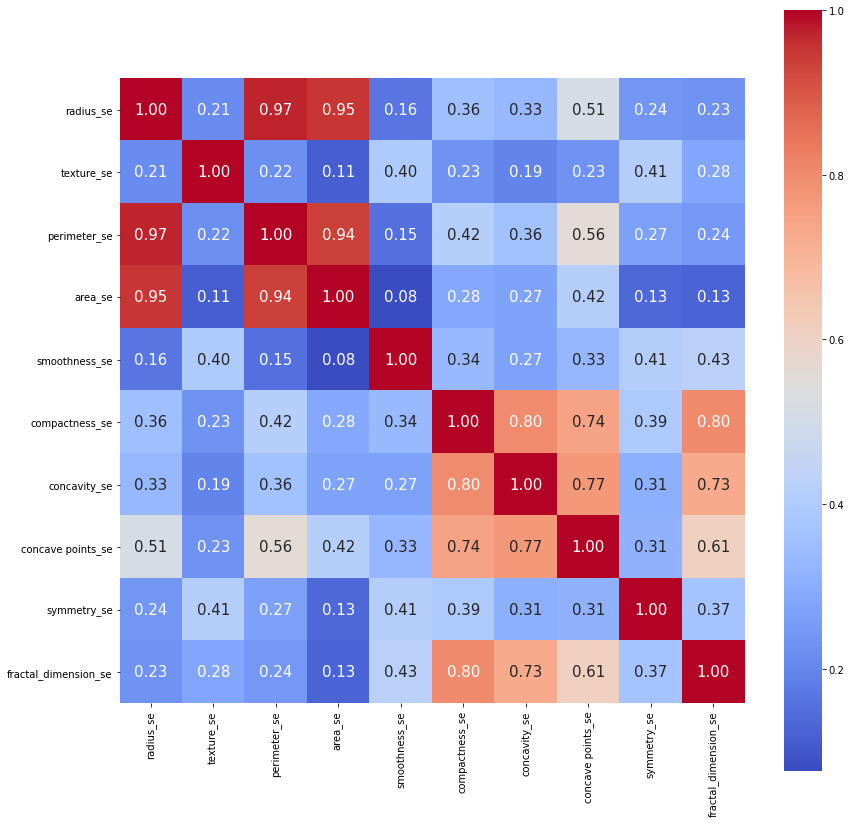

In [79]:
corr = df[features_se].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_se, yticklabels= features_se,
           cmap= 'coolwarm')

<AxesSubplot:>

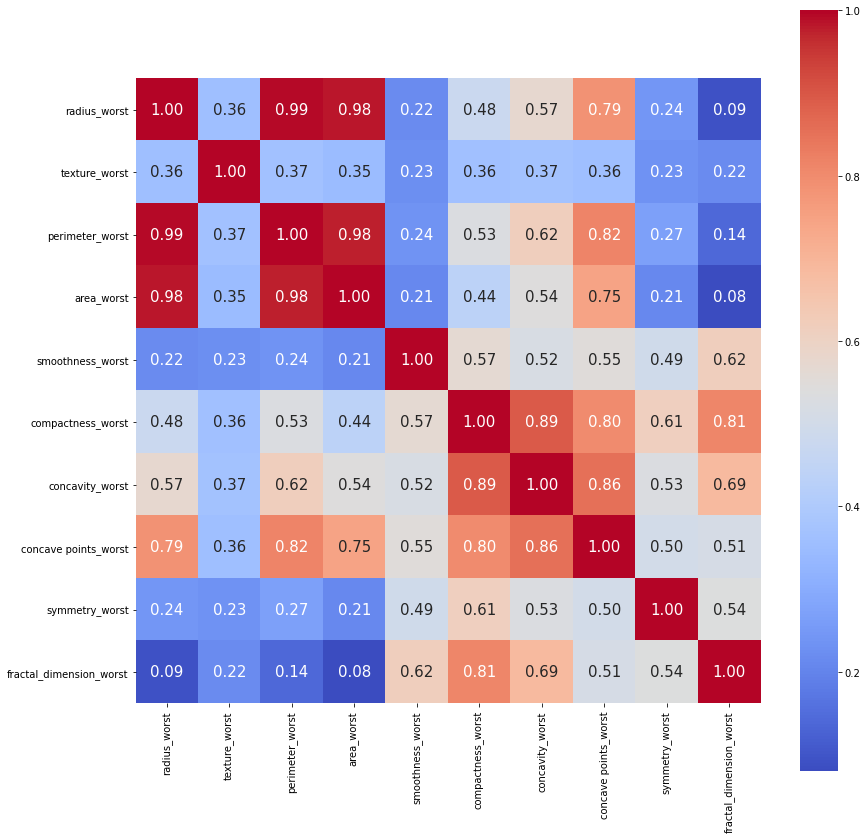

In [80]:
corr = df[features_worst].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_worst, yticklabels= features_worst,
           cmap= 'coolwarm')

In [26]:
def get_real_labels():

    real_labels = df['diagnosis'].tolist()

    i=-1
    for label in real_labels:
        i+=1
        if label == "B":
            real_labels[i] = 0
        elif label == "M":
            real_labels[i] = 1

    return real_labels

C:\Users\Dimitris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

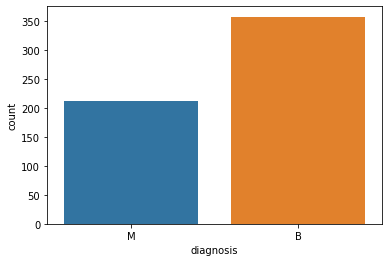

In [69]:
sns.countplot(df['diagnosis'],label="Count")

In [55]:
attributes_list = df.values.tolist()                      # list that holds the values of the attributes from our dataframe

i=-1
for attribute in attributes_list:
    i+=1
    attributes_list[i]=attribute[2:]

attributes_list = np.array(attributes_list)               # we transform our attributes list into an array
attributes_array = np.nan_to_num(attributes_list)         # we replace the Nan values with zeros

print("attributes array dimensions ", attributes_array.shape)

real_labels = get_real_labels()             

attributes array dimensions  (569, 30)


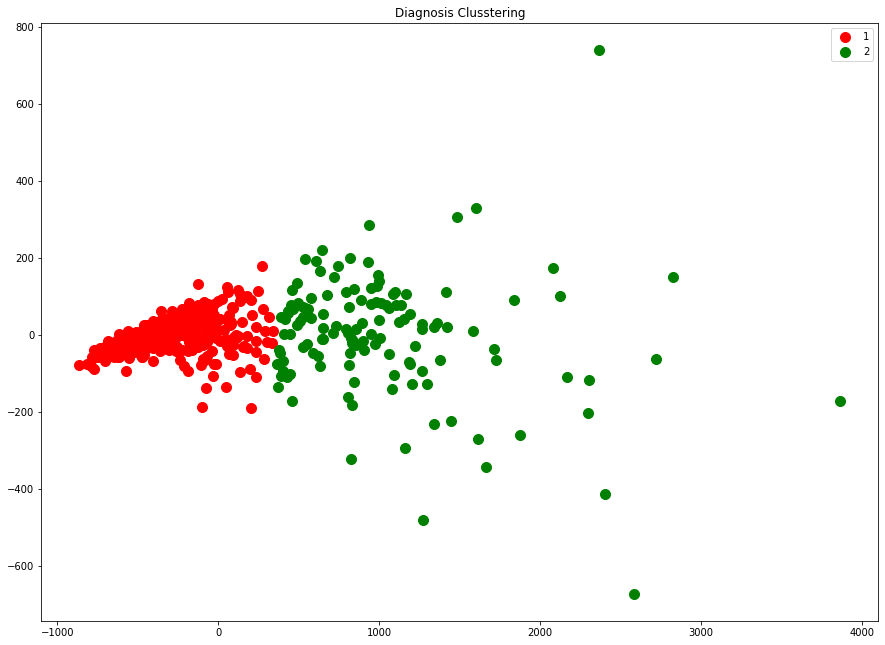

In [28]:
# K-means clusstering (with 2 clustters)

from sklearn.decomposition import PCA

kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=2, n_init=100)
kmeans.fit_predict(attributes_array)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

pca = PCA(n_components=2)

reduced_data = pca.fit_transform(attributes_array)
reduced_centroinds = pca.fit_transform(centroids)

plt.figure(figsize=(15, 11))

plt.scatter(reduced_data[kmeans_labels == 0, 0], reduced_data[kmeans_labels == 0, 1], s = 100, c = 'red', label='1')
plt.scatter(reduced_data[kmeans_labels == 1, 0], reduced_data[kmeans_labels == 1, 1], s = 100, c = 'green', label='2')

plt.title('Diagnosis Clusstering')
plt.legend()
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns

from sklearn.model_selection import train_test_split

classifiers = [
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),                             
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),                   
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]                

names = ["Gradient Boosting", "Nearest Neighbors", "RBF SVM",  
        "Decision Tree", "AdaBoost", "Random Forest", "MLP", 
        "Naive Bayes", "QDA","Logistic Regression"]              

def neural_networks_accuracy(data,real_labels):

    log_cols=["Classifier", "Accuracy"]
    log = pd.DataFrame(columns=log_cols)

    X_train, X_test, y_train, y_test = train_test_split(data, real_labels, test_size=0.3,random_state=109) # 70% of our data for training and the rest 30% for testing

    print("==============================")

    name_flag = -1
    for classifier in classifiers: 
        name_flag+=1

        start_time = time.time()

        scores = cross_val_score(classifier, X_train, y_train, cv=10)    # 10-k fold validation
        train_acc = scores.mean()                                        # we calculate the mean train accuracy score

        print(names[name_flag])
        print('****Results****')

        print("train accuracy score",train_acc)

        classifier.fit(X_train, y_train)

        test_acc = classifier.score(X_test, y_test)

        print("test accuracy score ", test_acc)
        
        log_entry = pd.DataFrame([[names[name_flag], test_acc*100]], columns=log_cols)
        log = log.append(log_entry)

        print("--- %s seconds ---" % (time.time() - start_time))

        print("==============================")

    log = log.sort_values(by=['Accuracy'], ascending=False)

    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

    plt.xlabel('Accuracy %')
    plt.title('Classifier Accuracy')
    plt.show()

Gradient Boosting
****Results****
train accuracy score 0.9597435897435898
test accuracy score  0.9649122807017544
--- 2.929666757583618 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.9169230769230771
test accuracy score  0.9649122807017544
--- 0.03804278373718262 seconds ---
RBF SVM
****Results****
train accuracy score 0.8994871794871795
test accuracy score  0.9239766081871345
--- 0.048035383224487305 seconds ---
Decision Tree
****Results****
train accuracy score 0.9446153846153846
test accuracy score  0.9649122807017544
--- 0.056059837341308594 seconds ---
AdaBoost
****Results****
train accuracy score 0.9572435897435898
test accuracy score  0.9824561403508771
--- 1.2281174659729004 seconds ---
Random Forest
****Results****
train accuracy score 0.9471794871794872
test accuracy score  0.9766081871345029
--- 1.83054518699646 seconds ---
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic 

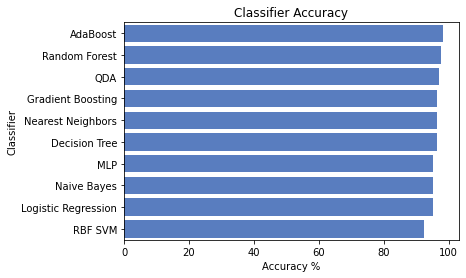

In [30]:
neural_networks_accuracy(attributes_array,real_labels) 

Gradient Boosting
****Results****
train accuracy score 0.9597435897435898
test accuracy score  0.9649122807017544
--- 2.899007558822632 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.9597435897435898
test accuracy score  0.9590643274853801
--- 0.0395510196685791 seconds ---
RBF SVM
****Results****
train accuracy score 0.9722435897435897
test accuracy score  0.9824561403508771
--- 0.040036916732788086 seconds ---
Decision Tree
****Results****
train accuracy score 0.9271794871794873
test accuracy score  0.9473684210526315
--- 0.05205821990966797 seconds ---
AdaBoost
****Results****
train accuracy score 0.9597435897435898
test accuracy score  0.9824561403508771
--- 1.2235989570617676 seconds ---
Random Forest
****Results****
train accuracy score 0.9446794871794871
test accuracy score  0.9766081871345029
--- 1.8197665214538574 seconds ---
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic 

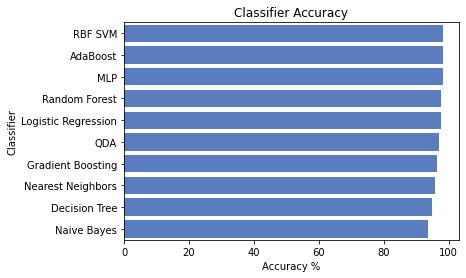

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))  # feature_range=(0,1)

data_scaled = scaler.fit_transform(attributes_array)

neural_networks_accuracy(data_scaled,real_labels) 

In [32]:
X = df.iloc[:,2:]           # independent columns
data = X.fillna(0)          # removing NaN values

labels = df.iloc[:,1:2]

print("data shape", data.shape)
print("labels shape", labels.shape)

data shape (569, 30)
labels shape (569, 1)


In [51]:
def chi_squared(data,labels):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2

    scaler = MinMaxScaler(feature_range=(0,1))                 # we scale our data to values between 0-1 to eliminate the negative values
    data_scaled = scaler.fit_transform(data)

    bestfeatures = SelectKBest(score_func=chi2, k=5)          # apply SelectKBest class to extract top 15 best features [chi^2]
    fit = bestfeatures.fit(data_scaled,labels)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(data.columns)

    featureScores = pd.concat([dfcolumns,dfscores],axis=1)     # concat two dataframes for better visualization 
    featureScores.columns = ['Features','Score']               # naming the dataframe columns
    print("Chi-Squared(Chi^2)")
    print("\n",featureScores.nlargest(5,'Score'))             # print 15 best features

In [44]:
def pcc(data,real_labels):
    from ITMO_FS.filters.univariate import pearson_corr

    labels = np.array(real_labels)

    scores = pearson_corr(data, labels)      # Pearson Correlation Coefficient

    column_names = data.columns

    pcc_dict = {}
    i=-1
    for score in scores:
        i+=1
        pcc_dict[column_names[i]] = score

    sorted_pcc_dict = dict( sorted(pcc_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

    df_pcc_index = pd.DataFrame.from_dict(sorted_pcc_dict, orient='index') 

    print("Pearson Correlation Coefficient\n")
    print(df_pcc_index.head(5))

In [46]:
def fisher_ratio(data,real_labels):
    from ITMO_FS.filters.univariate import f_ratio_measure

    labels = np.array(real_labels)

    scores = f_ratio_measure(data, labels)      # Fisher Ratio

    column_names = data.columns

    fisher_ratio_dict = {}
    i=-1
    for score in scores:
        i+=1
        fisher_ratio_dict[column_names[i]] = score

    sorted_fister_ratio_dict = dict( sorted(fisher_ratio_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

    df_fisher_ratio = pd.DataFrame.from_dict(sorted_fister_ratio_dict, orient='index') 

    print("Fisher Ratio\n")
    print(df_fisher_ratio.head(5))

In [47]:
def info_gain(data,labels):
    from sklearn.feature_selection import mutual_info_classif
    from collections import OrderedDict

    res = mutual_info_classif(data, labels, discrete_features=True)
                
    res = dict(zip(data.columns,
                mutual_info_classif(data, labels, discrete_features=True)        # Info Gain
                ))

    sorted_d = dict(sorted(res.items(), key=operator.itemgetter(1),reverse=True))

    print("Information Gain (Info-Gain)\n")

    flag = 1
    for key in sorted_d:
        flag+=1
        print(key,sorted_d[key])
        if flag == 6:
            break

In [48]:
def gini_index(data,real_lables):
    from ITMO_FS.filters.univariate import gini_index

    labels = np.array(real_labels)

    scores = gini_index(data, labels)      # Gini Index

    column_names = data.columns

    gini_index_dict = {}
    i=-1
    for score in scores:
        i+=1
        gini_index_dict[column_names[i]] = score

    sorted_gini_index_dict = dict( sorted(gini_index_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

    df_gini_index = pd.DataFrame.from_dict(sorted_gini_index_dict, orient='index') 

    print("Gini Index\n")
    print(df_gini_index.head(5))

In [52]:
chi_squared(data,labels)

Chi-Squared(Chi^2)

                 Features      Score
7    concave points_mean  52.405743
27  concave points_worst  46.341648
6         concavity_mean  46.186395
23            area_worst  35.043882
22       perimeter_worst  34.438091


In [56]:
pcc(data,real_labels)

Pearson Correlation Coefficient

                             0
concave points_worst  0.793566
perimeter_worst       0.782914
concave points_mean   0.776614
radius_worst          0.776454
perimeter_mean        0.742636


In [57]:
fisher_ratio(data,real_labels)

Fisher Ratio

                             0
concave points_worst  1.943074
perimeter_worst       1.509108
concave points_mean   1.464065
radius_worst          1.452209
perimeter_mean        1.210782


In [64]:
info_gain(data,real_labels)

Information Gain (Info-Gain)

concave points_mean 0.653007240085633
concavity_mean 0.6481345006792363
smoothness_se 0.6481345006792363
area_worst 0.6481345006792363
radius_se 0.6472149081594392
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\me

In [65]:
gini_index(data,real_labels)

Gini Index

                      0
texture_se     0.226079
texture_mean   0.223479
smoothness_se  0.212006
texture_worst  0.210971
radius_mean    0.186943


0.96 accuracy with a standard deviation of 0.03


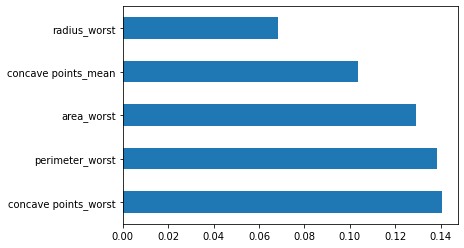

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier() 
scores = cross_val_score(model, data, labels, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) 

model.fit(data,labels) 
feat_importances = pd.Series(model.feature_importances_, index=data.columns)  # plot graph of feature importances for better visualization
feat_importances.nlargest(5).plot(kind='barh')
plt.show() 

In [39]:
new_df = df[['diagnosis','concave points_mean', 'concave points_worst', 'radius_worst', 'area_worst', 'perimeter_worst']].copy()
new_df.head(5)

,diagnosis,concave points_mean,concave points_worst,radius_worst,area_worst,perimeter_worst
0,M,0.14710,0.2654,25.38,2019.0,184.60
1,M,0.07017,0.1860,24.99,1956.0,158.80
2,M,0.12790,0.2430,23.57,1709.0,152.50
3,M,0.10520,0.2575,14.91,567.7,98.87
4,M,0.10430,0.1625,22.54,1575.0,152.20


In [40]:
real_labels = new_df['diagnosis'].tolist()

attributes_list = new_df.values.tolist()                # list that holds the values of the attributes from our dataframe

i=-1
for attribute in attributes_list:
    i+=1
    attributes_list[i]=attribute[1:]

attributes_list = np.array(attributes_list)             # we transform our attributes list into an array
attributes_array = np.nan_to_num(attributes_list)       # we replace the Nan values with zeros

print("attributes array dimensions ", attributes_array.shape)    

attributes array dimensions  (569, 5)


Gradient Boosting
****Results****
train accuracy score 0.9346153846153846
test accuracy score  0.9649122807017544
--- 0.917046308517456 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.9321153846153847
test accuracy score  0.9649122807017544
--- 0.03903484344482422 seconds ---
RBF SVM
****Results****
train accuracy score 0.9423076923076923
test accuracy score  0.9590643274853801
--- 0.03202986717224121 seconds ---
Decision Tree
****Results****
train accuracy score 0.9295512820512821
test accuracy score  0.9590643274853801
--- 0.02101922035217285 seconds ---
AdaBoost
****Results****
train accuracy score 0.9346794871794872
test accuracy score  0.9532163742690059
--- 0.8209049701690674 seconds ---
Random Forest
****Results****
train accuracy score 0.9371794871794872
test accuracy score  0.9649122807017544
--- 1.5576951503753662 seconds ---
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic 

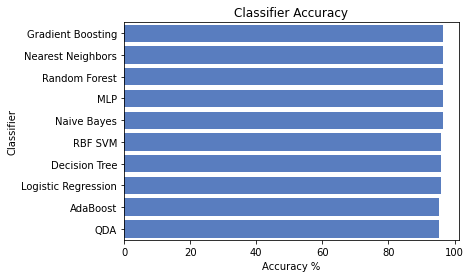

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))  # feature_range=(0,1)

data_scaled = scaler.fit_transform(attributes_array)

neural_networks_accuracy(data_scaled,real_labels) 